In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_openml
import os.path as osp
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
from lightgbm import LGBMClassifier as lgb

# Problem 0
As we have covered in class, we are training a logistic regression model to predict if someone will click on an advertisement. Consider the logistic regression model with 3 features and weights w = [1, −30, 3]. For the dataset with features x1=[20,0,0], y1=1 and x2=[23,1,1], y2=0

In [7]:
# Bullet 1, Compute the probabilities that the logistic regression assigns to these two customers clicking on the advertisement (i.e. P (y = 1))
w = np.array([1,-30,3])
x1, y1 = np.array([20,0,0]).T, np.array([1]).T
x2, y2 = np.array([23,1,1]).T, np.array([0]).T

s1 = np.dot(w,x1)
s2 = np.dot(w,x2)

def sigmoid(z):
    denom = 1 + np.exp(-z)
    return 1/denom

z1 = sigmoid(s1)
z2 = sigmoid(s2)

print('Probabilities that customers click on the advertisement: y1 -> ', z1, '; y2 -> ', 1-z2, sep="")

Probabilities that customers click on the advertisement: y1 -> 0.9999999979388463; y2 -> 0.9820137900379085


In [8]:
# Bullet 2, Compute the cross entropy loss of this logistic regression.

def cross_entropy(p, q):
    return -(p*np.log2(q) + (1-p)*np.log2((1-q)))

print('Cross Entropy loss: ', cross_entropy(z1, z2))

Cross Entropy loss:  5.796964962660905


Impurity of the root: 49.76%
Our split: 21.50
Impurity for left leaf (0.00%) and the right leaf (0.00%)


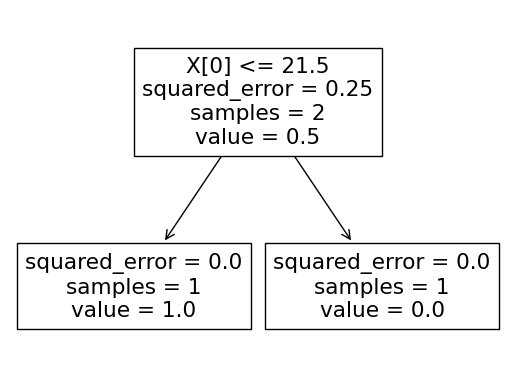

In [10]:
# Bullet 3, Design a decision stump (a decision tree of depth 1) that splits on the first feature. What is the Gini impurity of the root? 
# What is the Gini impurity after the best split that you find?
def gini_impurity(proba : list):
    pr_sq = [np.square(x) for x in proba]
    impurity = 1 - sum(pr_sq)
    return impurity

root = DecisionTreeRegressor(criterion="squared_error", splitter="best", max_depth=1, ccp_alpha=0)

X = np.vstack((x1[0], x2[0]))
Y = np.vstack((y1, y2))

root.fit(X, Y)
y_pred = root.predict(X)
plot_tree(root, max_depth=1)

# Calculations being done by hand

root_bucket = x1[0] + x2[0]
proba = [x1[0]/root_bucket, x2[0]/root_bucket]
print("Impurity of the root: {:.2%}".format(gini_impurity(proba)))

difference = (x1[0] + x2[0])/2
print('Our split: {:.2f}'.format(difference))

left_leaf_bucket = x1[0]
right_leaf_bucket = x2[0]

print("Impurity for left leaf ({:.2%}) and the right leaf ({:.2%})".format(gini_impurity([left_leaf_bucket/left_leaf_bucket]), gini_impurity([right_leaf_bucket/right_leaf_bucket])))

# Problem 1
In this problem you will explore the dataset CIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it. You will also explore visualizing the solution.

In [11]:
# Problem 1
# Bullet 3, fetch the CIFAR_10_small data 
if not osp.exists('cifar-10-small.pkl'):
    cifar = fetch_openml("CIFAR_10_small")
    with open("cifar-10-small.pkl", "wb") as bunch:
        pickle.dump(cifar, bunch, protocol=pickle.HIGHEST_PROTOCOL)
with open('cifar-10-small.pkl', 'rb') as file:
    cifar = pickle.load(file)

Category Labels 
0. airplane  
1. automobile          
2. bird          
3. cat          
4. deer          
5. dog          
6. frog          
7. horse          
8. ship          
9. truck


Text(0.5, 1.0, 'a0')

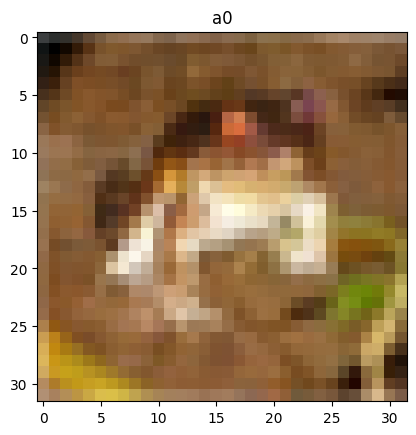

In [12]:
# Bullet 4, Figure out how to display some of the images in this data set, and display a couple. 
#   While not high resolution, these should be recognizable if you are doing it correctly.
# Lists the category labels for entries
descr = 'Category Labels \n'+ str(cifar['DESCR']).rsplit(sep=':', maxsplit=2)[2].split('The')[0].strip()
print(descr)

x, y, x_names, y_names = cifar['data'], cifar['target'], cifar['feature_names'], cifar['target_names']

x = np.array(x)

# Reshaping the images so they may be processsed 
# print(x.shape)
images = x.reshape(len(x), 3,32,32)
images = images.transpose(0,2,3,1)
# print(images.shape)

# Displaying a single image
plt.imshow(images[0]/255)
plt.title(x_names[0])


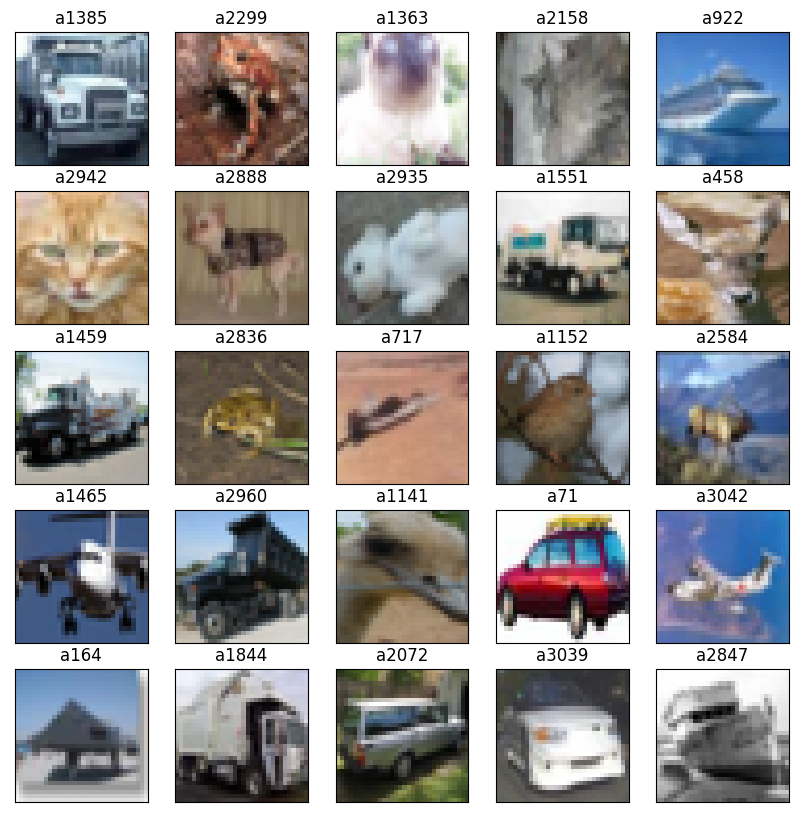

In [13]:
# Displaying multiple images at once
rows, columns = 5, 5
imageId = np.random.randint(0, len(images), rows * columns)
multiImages = images[imageId]
# print(len(x_names))
labels = [x_names[i%3072] for i in imageId]

fig = plt.figure(figsize=(10, 10))
for i in range(1, rows*columns+1,1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(multiImages[i-1]/255)
    plt.xticks([])
    plt.yticks([])
    plt.title("{}"
          .format(labels[i-1]))
plt.show()

In [14]:
# Bullet 5, There are 20,000 data points. Do a train-test split on 3/4 - 1/4.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75)

In [15]:
# Bullet 6, Run multi-class logistic regression on these using the cross entropy loss.
# Bullet 7, Report your training and test loss.

# Creates constants 
penalties = ['l1', 'l2']
l1_acc, l1_scores = [], []
l2_acc, l2_scores = [], []

In [ ]:
# L1 Penalty, Lasso Regression 

cv = 3
lr1 = LogisticRegressionCV(penalty=penalties[0], multi_class="multinomial", solver='saga', cv=cv, max_iter=500, tol=0.1)
lr1.fit(x_train, y_train)
y_predict = lr1.predict(x_test)
l1_acc.append(accuracy_score(y_test, y_predict))
l1_scores.append((lr1.score(x_train, y_train), lr1.score(x_test, y_test)))

print("At cross validation of {}, the accuracy is {:.2%}".format(cv, max(l1_acc)))
print("Training Score: {:.2%}; Test Score: {:.2%}".format(l1_scores[0][0], l1_scores[0][1]))

In [ ]:
# L2 Penalty, Ridge Regression

cv = 3
lr2 = LogisticRegressionCV(penalty=penalties[1], multi_class="multinomial", solver='saga', cv=cv, max_iter=500, tol=0.1)
lr2.fit(x_train, y_train)
y_predict = lr2.predict(x_test)
l2_acc.append(accuracy_score(y_test, y_predict))
l2_scores.append((lr2.score(x_train, y_train), lr2.score(x_test, y_test)))

print("At cross validation of {}, the accuracy is {:.2%}".format(cv, max(l2_acc)))
print("Training Score: {:.2%}; Test Score: {:.2%}".format(l2_scores[0][0], l2_scores[0][1]))

In [ ]:
# Bullet 8, How sparse can you make your solutions without deteriorating your testing error too much?


print('The number of features for our model:', lr1.coef_.shape[1])
# lr1.sparsify()

lr_sparse_acc = []
lr_sparse_scores = []
C_list = [10, 5, 1]

cv_sparse = 3
for c in C_list:
    print(c)
    lr_sparse = LogisticRegressionCV(Cs=c, penalty=penalties[0], multi_class="multinomial", solver='saga', cv=cv_sparse, max_iter=500, tol=0.1, n_jobs=6)
    lr_sparse.fit(x_train, y_train)
    y_predict = lr_sparse.predict(x_test)
    lr_sparse_acc.append(accuracy_score(y_test, y_predict))
    lr_sparse_scores.append((lr_sparse.score(x_train, y_train), lr_sparse.score(x_test, y_test)))

print("Float values of C")
lr_sparse = LogisticRegressionCV(Cs=[0.1, 0.001, 0.0001], penalty=penalties[0], multi_class="multinomial", solver='saga', cv=cv_sparse, max_iter=500, tol=0.1, n_jobs=6)
lr_sparse.fit(x_train, y_train)
y_predict = lr_sparse.predict(x_test)
lr_sparse_acc.append(accuracy_score(y_test, y_predict))
lr_sparse_scores.append((lr_sparse.score(x_train, y_train), lr_sparse.score(x_test, y_test)))


In [ ]:
# Bullet 8 Final Values
print("At cross validation of {}, the accuracy is {:.2%}".format(cv, max(l1_acc))) # Modify this to find best score.
print("Training Score: {:.2%}; Test Score: {:.2%}".format(lr_sparse_scores[l1_acc.index(max(l1_acc))][0], lr_sparse_scores[l1_acc.index(max(l1_acc))][1]))

# Problem 2

You will repeat the previous problem but for the MNIST dataset which you will find here: https://www.openml.org/d/554. MNIST is a dataset of handwritten digits, and is considered one of the easiest image recognition problems in computer vision. We will see here how well logistic regression does, as you did above on the CIFAR-10 subset. In addition, we will see that we can visualize the solution, and that in connection to this, sparsity can be useful.

In [ ]:
#Fetch the MNIST dataset.
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
X = mnist["data"]
y = mnist["target"]

#Split the dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Run multi-class logistic regression
clf = LogisticRegression(C=50/len(X_train), multi_class='multinomial', solver="saga", tol=0.1)
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
train_score = clf.score(X_train, y_train)
print("Training Score: ", train_score)
print("Test Score: ", test_score)
print('Best C % .4f' % clf.C)

#Report training and test loss
from sklearn.metrics import log_loss
y_train_pred = clf.predict_proba(X_train)
y_test_pred = clf.predict_proba(X_test)
train_loss = log_loss(y_train, y_train_pred)
test_loss = log_loss(y_test, y_test_pred)
print("Training Loss: ", train_loss)
print("Test Loss: ", test_loss)

In [ ]:
#Choose an ℓ1 regularizer (penalty), and see if you can get a sparse solution with almost as good accuracy.
clf = LogisticRegression(C=50/len(X_train), multi_class='multinomial', solver="saga", tol=0.1, penalty="l1")
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
test_score = clf.score(X_test, y_test)
train_score = clf.score(X_train, y_train)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % test_score)
print("Training Score with l1 penalty: ", train_score)

In [ ]:
#Note that in Logistic Regression, the coefficients returned (i.e., the β’s) are the same dimension as the data.
#Therefore we can pretend that the coefficients of the solution are an image of the same dimension, and plot it.
#Do this for the 10 sets of coefficients that correspond to the 10 classes.
#You should observe that, at least for the sparse solutions, these “kind of” look like the digits they are classifying.

#Plot the coefficients
plt.figure(figsize=(10, 5))
scale = np.abs(clf.coef_).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(clf.coef_[i].reshape(28, 28), interpolation='nearest', cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for 10 sets of coefficients for the 10 classes')
plt.show()

# Problem 3
Problem 3: Revisiting Logistic Regression and MNIST.
Here we throw the kitchen sink of classical ML (i.e. pre-deep learning) on MNIST.

In [ ]:
# train = pd.read_csv("archive/mnist_train.csv")

In [ ]:
# x=train.iloc[:,1:]
# y=train.iloc[:,0]
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)

In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

In [ ]:
cv_score = cross_val_score(rf, x, y)
print (np.mean(cv_score))

In [ ]:
gb = lgb(n_estimators=100)

gb.fit(X_train, y_train)

pred = gb.predict(X_test)

print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

In [ ]:
cv_score = cross_val_score(gb, x, y)
print (np.mean(cv_score))

# Problem 4: Revisiting Logistic Regression and CIFAR-10.
As before, we’ll throw the kitchen sink of classical ML (i.e. pre-deep learning) on CIFAR-10. Keep in mind that CIFAR-10 is a few times larger. <br>
• What is the best accuracy you can get on the test data, by tuning Random Forests? What are the hyperparameters of your best model? <br>
• What is the best accuracy you can get on the test data, by tuning any model including Gradient boosting? What are the hyperparameters of your best model?

In [ ]:
# Part 1, What is the best accuracy you can get on the test data, by tuning Random Forests? What are the hyperparameters of your best model?

acc_est = []
acc_depth = []
acc_gamma = []

est =   [10, 20, 100, 200, 300, 400, 500, 600]
depth = [None, 6, 10, 20, 50, 100, 250, 500]
gamma = [1, 2, 10, 20, 100, 200, 1000, 2000]

# Tunning Estimator
print("Tunning the n_est")
for e in est:
    print(e)
    rfc = RandomForestClassifier(n_estimators=e, criterion="gini", max_depth=None, ccp_alpha=0)
    rfc.fit(x_train, y_train)
    y_pred_rfc = rfc.predict(x_test)
    acc_est.append(accuracy_score(y_test, y_pred_rfc))

print("Tunning the depth")
# Tunning depth
for d in depth:
    print(d)
    rfc = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=e, ccp_alpha=0)
    rfc.fit(x_train, y_train)
    y_pred_rfc = rfc.predict(x_test)
    acc_depth.append(accuracy_score(y_test, y_pred_rfc))

print("Tunning the gamma")
# Tunning gamma
for g in gamma:
    print(g)
    rfc = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, ccp_alpha=g)
    rfc.fit(x_train, y_train)
    y_pred_rfr = rfc.predict(x_test)
    acc_gamma.append(accuracy_score(y_test, y_pred_rfr))

In [ ]:
print(max(acc_est), max(acc_depth), max(acc_gamma))

rfc = RandomForestClassifier(n_estimators=max(acc_est), criterion="gini", max_depth=max(acc_depth), ccp_alpha=max(acc_gamma))
rfc.fit(x_train, y_train)
y_pred_rfr = rfc.predict(x_test)
print("Maximized accuracy score: {:.2%}".format(accuracy_score(y_test, y_pred_rfr)))

In [ ]:
# Part 1, (Method 2) Another method to optimize our model
# train = pd.read_csv("cifar10/train.csv")
# x=train.iloc[:,1:]
# y=train.iloc[:,0]

x, y, x_names, y_names = cifar['data'], cifar['target'], cifar['feature_names'], cifar['target_names']

x = np.array(x)

# Reshaping the images so they may be processsed 
# print(x.shape)
images = x.reshape(len(x), 3,32,32)
images = images.transpose(0,2,3,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
rf=RandomForestClassifier(n_estimators=100, n_jobs=5)

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

In [ ]:
# Part 2, What is the best accuracy you can get on the test data, by tuning any model including Gradient boosting? What are the hyperparameters of your best model?
gb = lgb(boosting_type='gbdt', 
                 objective='multiclass', num_class=10,
                 num_iteration=100, max_depth=4, learning_rate=0.01, 
                 n_estimators=100, nthread=4, silent=False)

gb.fit(X_train, y_train)

pred = gb.predict(X_test)

print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)